# **IMPORTING THE LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **IMPORTING THE DATASET**

In [3]:
df=pd.read_csv("/content/house_price (1).csv")

In [4]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [6]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

In [5]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


# **DETECT AND REMOVE OUTLIERS**

***1.USING MEAN FUNCTION METHOD***

In [7]:
mean_price_per_sqft=df['price_per_sqft'].mean()
std_price_per_sqft=df['price_per_sqft'].std()

In [8]:
print("MEAN=",mean_price_per_sqft)
print("STD=",std_price_per_sqft)

MEAN= 7920.336742424242
STD= 106727.16032810867


In [9]:
lowerbound=mean_price_per_sqft-2*std_price_per_sqft
upperbound=mean_price_per_sqft+2*std_price_per_sqft
print("lower_bound is",lowerbound)
print("upperbound",upperbound)

lower_bound is -205533.9839137931
upperbound 221374.65739864158


In [11]:
df_no_outlier_mean=df[(df['price_per_sqft']>=lowerbound)&(df['price_per_sqft']<=upperbound)]

In [12]:
df_no_outlier_mean

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


***2.USING PERCENTILE METHOD***

In [31]:
lower_percentile = df['price_per_sqft'].quantile(0.05)
upper_percentile = df['price_per_sqft'].quantile(0.95)
print("lower_percentile:",lower_percentile)
print("upper_percentile:",upper_percentile)

lower_percentile: 3107.8500000000004
upper_percentile: 15312.099999999984


In [32]:
df_no_outliers_percentile = df[(df['price_per_sqft'] >= lower_percentile) & (df['price_per_sqft'] <= upper_percentile)]
df_no_outliers_percentile

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039554
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030971
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033876
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015698
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034391
...,...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530,-0.013028
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.011538
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.029897
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.024946


***3.USING IQR METHOD***

In [15]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

In [16]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [17]:
df_no_outliers_iqr = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]

***4.USING NORMAL DISTRIBUTION***

In [18]:
from scipy.stats import norm

# Calculate the mean and standard deviation
mean_price_per_sqft = df['price_per_sqft'].mean()
std_price_per_sqft = df['price_per_sqft'].std()


In [30]:
print("mean_price_per_sqft is:",mean_price_per_sqft )

print("std_price_per_sqft is:",std_price_per_sqft)

mean_price_per_sqft is: 7920.336742424242
std_price_per_sqft is: 106727.16032810867


In [19]:

# Define the bounds
lower_bound = norm.ppf(0.025, mean_price_per_sqft, std_price_per_sqft)
upper_bound = norm.ppf(0.975, mean_price_per_sqft, std_price_per_sqft)

# Filter the dataframe
df_no_outliers_normal = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]

***5.USING Z-SCORE METHOD***

In [29]:
from scipy.stats import zscore

# Calculate the z-scores
df['z_score'] = zscore(df['price_per_sqft'])

# Define a threshold (e.g., z-score of ±2)
threshold = 2

# Filter the dataframe
df_no_outliers_zscore = df[(df['z_score'].abs() <= threshold)]

# Drop the z-score column
df_no_outliers_zscore.drop(columns=['z_score'], inplace=True)

<ipython-input-29-fb8d3da89cd3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers_zscore.drop(columns=['z_score'], inplace=True)


***6.BOXPLOT FOR ALL NUMERICAL COLUMNS***

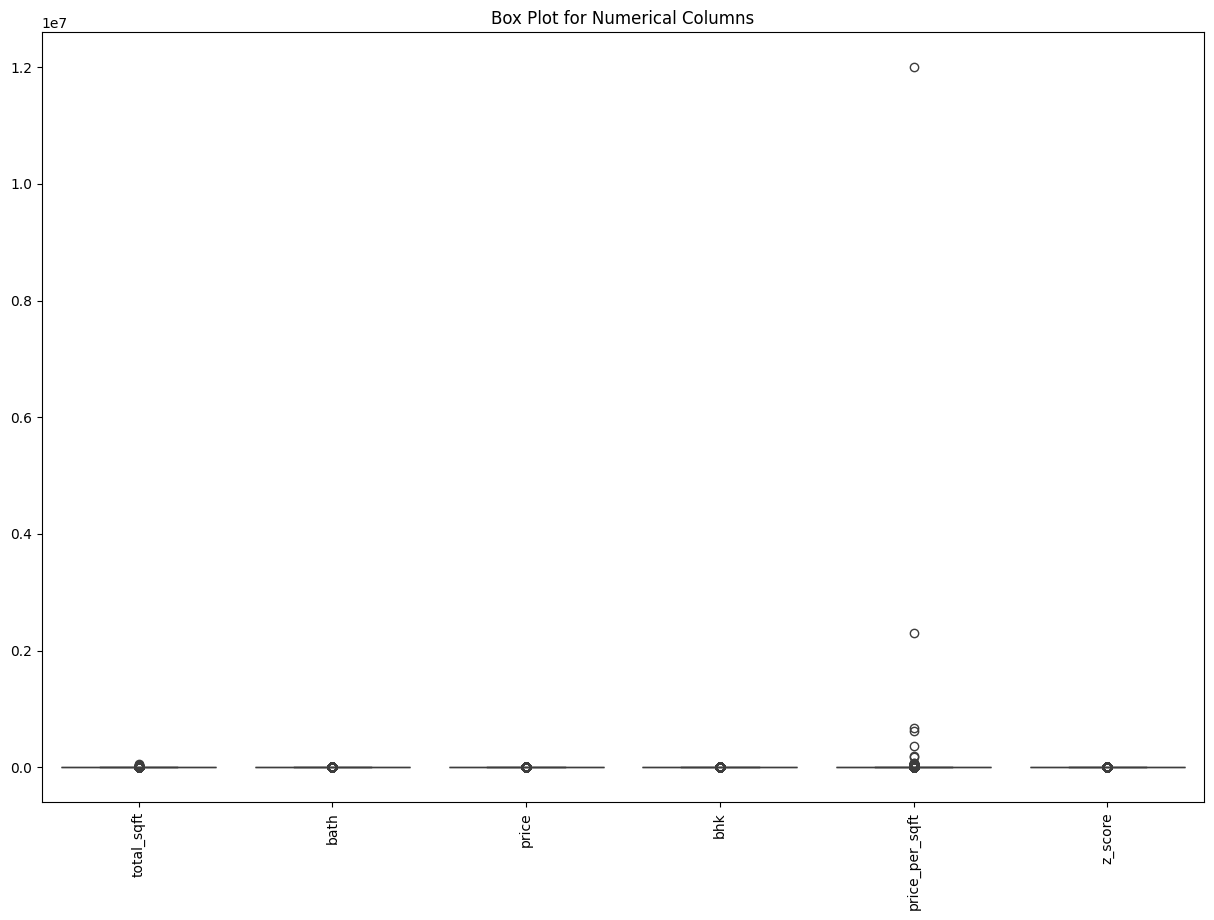

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot box plots for all numerical columns
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=90)
plt.title('Box Plot for Numerical Columns')
plt.show()

***7.HISTOGRAM FOR 'price_per_sqft'COLUMN***

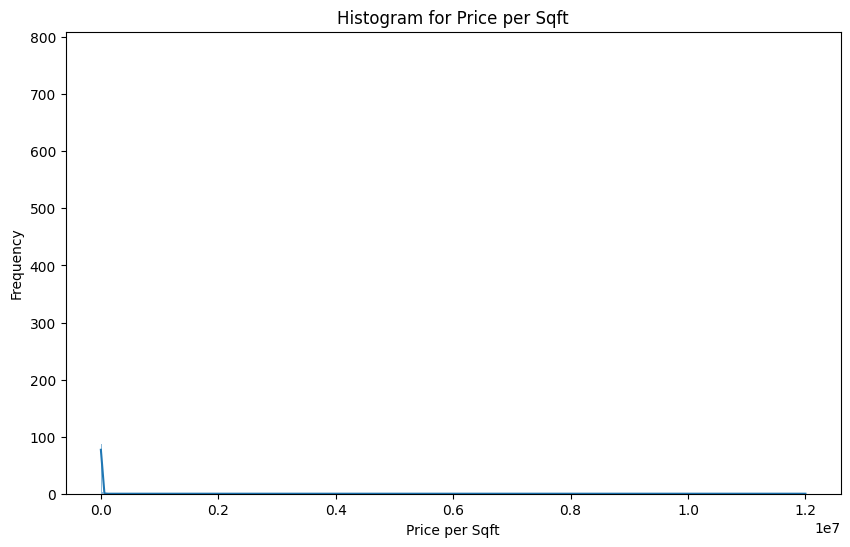

In [22]:
# Plot histogram for price_per_sqft column
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft'], kde=True)
plt.title('Histogram for Price per Sqft')
plt.xlabel('Price per Sqft')
plt.ylabel('Frequency')
plt.show()


# **CORRELATION ANALYSIS**

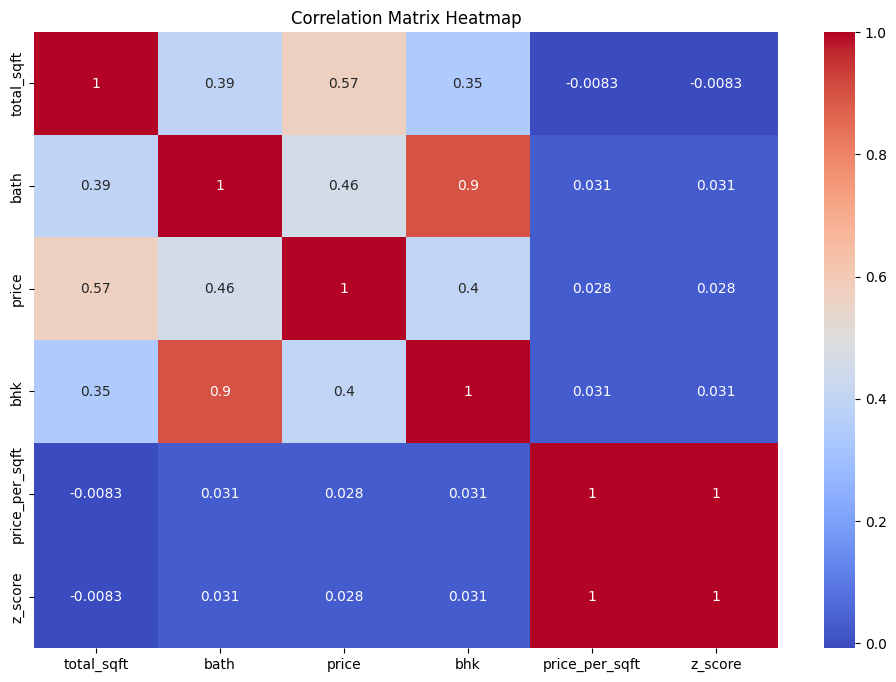

In [28]:
# Compute the correlation matrix
df_numerical = df.select_dtypes(include=['float64', 'int64'])
corr_matrix=df_numerical.corr()
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

***SCATTERPLOT B ETWEEN NUMERICAL VALUES***

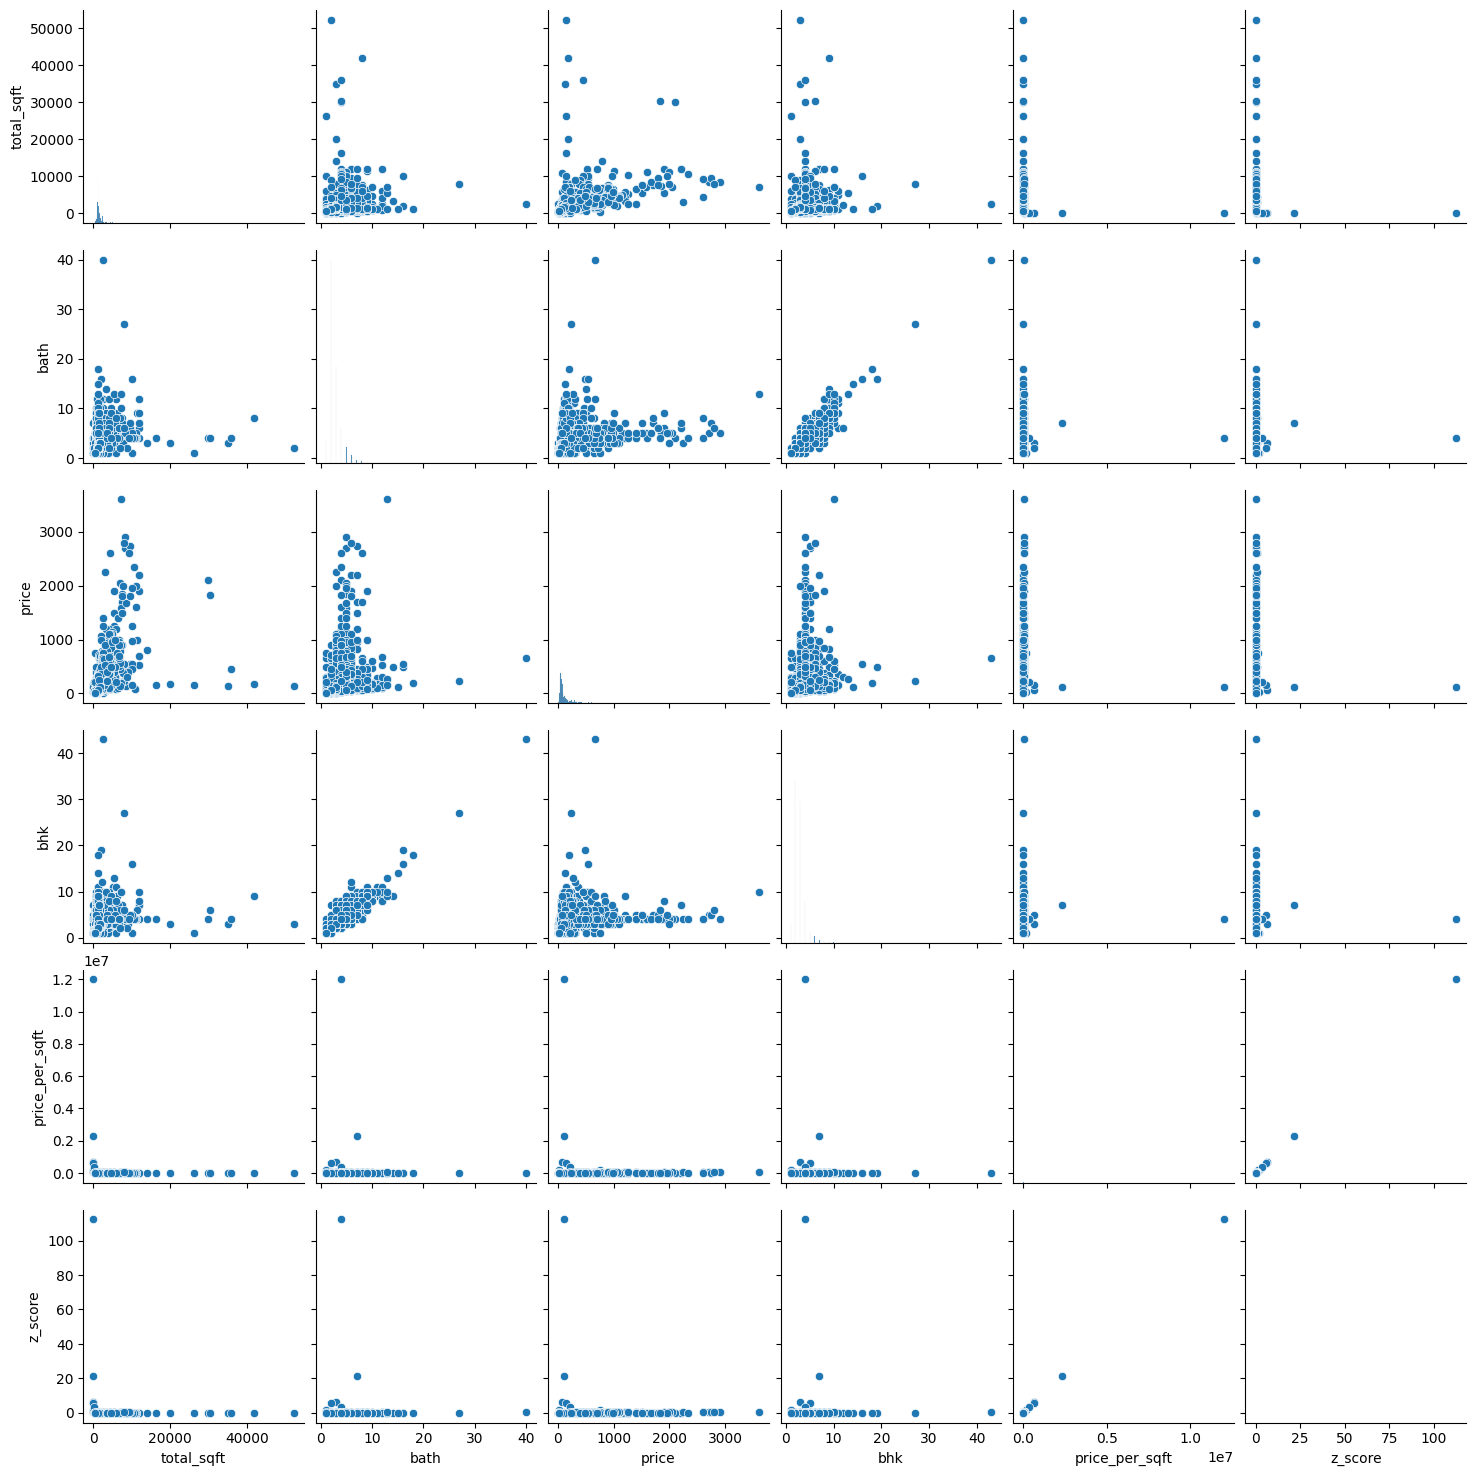

In [25]:
# Plot scatter plots between numerical variables
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.show()